# 2024-02-24 35 - Is Constrained PatchTST worth exploring.ipynb

## Libraries

In [2]:
%load_ext autoreload
%autoreload 2

In [22]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown, Latex
from utils import wandb_utils

## Download data

In [23]:
df = wandb_utils.get_experiment_data("Autoformer-javierdev","alelab",experiment_tags=[],query_dict={"$and": [
                        {"tags": {"$in": ["dev_koopa"]}},
                        {"state": {"$in":["finished","crashed"]}},
        ]})

100%|██████████| 5/5 [00:00<00:00, 155.97it/s]

WARNING!! Missing pointwise/cvar/0.01 in run qnf2b7lf on sweep None. Filling all poitwisewith NAN.
WARNING!! Missing pointwise/cvar/0.01 in run 7sc534en on sweep None. Filling all poitwisewith NAN.
WARNING!! Missing pointwise/cvar/0.01 in run 3w73snae on sweep None. Filling all poitwisewith NAN.
WARNING!! Missing pointwise/cvar/0.01 in run bggqj18w on sweep None. Filling all poitwisewith NAN.
WARNING!! Missing pointwise/cvar/0.01 in run hga689kd on sweep None. Filling all poitwisewith NAN.
Fetched 5 runs
Total records: (720, 115)
Total runs: 5


## Compare the runs

<AxesSubplot:xlabel='step', ylabel='mse'>

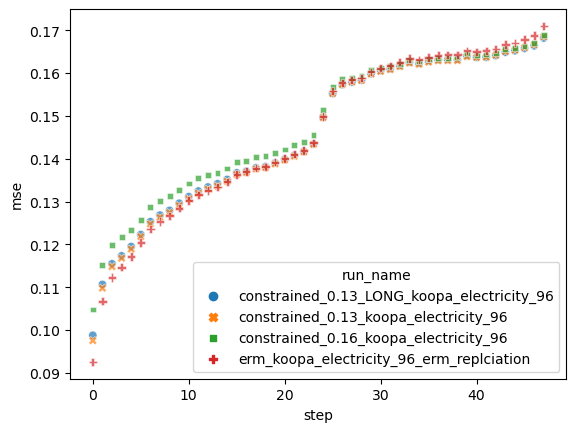

In [28]:
# PARAMS
split="test"
constraint_idx = 1 # use the 50 percentile constraint to plot 1=25,2=50,3=75
seed=2021

# Filter
df_to_plot=df.query('split==@split')
df_to_plot = df_to_plot[df_to_plot['run_name'].str.contains('erm|LONG|0.16|0.13')]


#g = sns.FacetGrid(df_to_plot, col='run_id', row='data_path', hue='type', height=3, aspect=1.5, legend_out=True)
#g.map(sns.scatterplot, "step", "mse", alpha=.7)
sns.scatterplot(data=df_to_plot, x="step", y="mse", hue="run_name", style="run_name", alpha=.7)